# Veri Analizi 101 Covid-19 Projesi | Kız Başına Veri Analizi Bootcamp

Gerekli kütüphanelerin içe aktarılması,

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv) 
import seaborn as sns
import matplotlib.pyplot as plt

Veri setinin yüklenmesi,

In [2]:
df = pd.read_csv('/kaggle/input/CORD-19-research-challenge/metadata.csv')


/tmp/ipykernel_36/1972980800.py:1: DtypeWarning: Columns (1,4,5,6,13,14,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/kaggle/input/CORD-19-research-challenge/metadata.csv')


İlk ve son satırların görüntülenmesi,

In [3]:
df.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,cord_uid,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,authors,journal,mag_id,who_covidence_id,arxiv_id,pdf_json_files,pmc_json_files,url,s2_id
0,ug7v899j,d1aafb70c066a2068b02786f8929fd9c900897fb,PMC,Clinical features of culture-proven Mycoplasma...,10.1186/1471-2334-1-6,PMC35282,11472636,no-cc,OBJECTIVE: This retrospective chart review des...,2001-07-04,"Madani, Tariq A; Al-Ghamdi, Aisha A",BMC Infect Dis,NaN,NaN,NaN,document_parses/pdf_json/d1aafb70c066a2068b027...,document_parses/pmc_json/PMC35282.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3...,NaN
1,02tnwd4m,6b0567729c2143a66d737eb0a2f63f2dce2e5a7d,PMC,Nitric oxide: a pro-inflammatory mediator in l...,10.1186/rr14,PMC59543,11667967,no-cc,Inflammatory diseases of the respiratory tract...,2000-08-15,"Vliet, Albert van der; Eiserich, Jason P; Cros...",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/6b0567729c2143a66d737...,document_parses/pmc_json/PMC59543.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
2,ejv2xln0,06ced00a5fc04215949aa72528f2eeaae1d58927,PMC,Surfactant protein-D and pulmonary host defense,10.1186/rr19,PMC59549,11667972,no-cc,Surfactant protein-D (SP-D) participates in th...,2000-08-25,"Crouch, Erika C",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/06ced00a5fc04215949aa...,document_parses/pmc_json/PMC59549.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
3,2b73a28n,348055649b6b8cf2b9a376498df9bf41f7123605,PMC,Role of endothelin-1 in lung disease,10.1186/rr44,PMC59574,11686871,no-cc,Endothelin-1 (ET-1) is a 21 amino acid peptide...,2001-02-22,"Fagan, Karen A; McMurtry, Ivan F; Rodman, David M",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/348055649b6b8cf2b9a37...,document_parses/pmc_json/PMC59574.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
4,9785vg6d,5f48792a5fa08bed9f56016f4981ae2ca6031b32,PMC,Gene expression in epithelial cells in respons...,10.1186/rr61,PMC59580,11686888,no-cc,Respiratory syncytial virus (RSV) and pneumoni...,2001-05-11,"Domachowske, Joseph B; Bonville, Cynthia A; Ro...",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/5f48792a5fa08bed9f560...,document_parses/pmc_json/PMC59580.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN


In [4]:
df.tail()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,cord_uid,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,authors,journal,mag_id,who_covidence_id,arxiv_id,pdf_json_files,pmc_json_files,url,s2_id
1056655,aeuy92bx,d86cfba423427426c10fa9092748733f5c7ca7e0; a8e5...,BioRxiv; MedRxiv; WHO,Potent neutralization of 2019 novel coronaviru...,10.1101/2020.02.01.929976,NaN,NaN,medrxiv,"2019-nCoV, which is a novel coronavirus emerge...",2020-02-02,"Lei, Changhai; Fu, Wenyan; Qian, Kewen; Li, Ti...",bioRxiv,NaN,NaN,NaN,document_parses/pdf_json/d86cfba423427426c10fa...,NaN,https://doi.org/10.1101/2020.02.01.929976,211121242.0
1056656,n8hlrknq,b98985f125c3391aac709332e6380fe8b11ef6e5,Elsevier; Medline; PMC,"Molecular-based diagnostics, including future ...",10.1016/j.mpmed.2013.08.012,PMC7108438,32288574.0,no-cc,Microbiology laboratories have traditionally r...,2013-10-28,"Goldenberg, Simon",Medicine (Abingdon),NaN,NaN,NaN,document_parses/pdf_json/b98985f125c3391aac709...,document_parses/pmc_json/PMC7108438.xml.json,https://api.elsevier.com/content/article/pii/S...,214756712.0
1056657,05dxn54t,0d1698212a1fcbbed2ffff38953397b3fb82f30d,Medline; PMC,A Patient With Bilateral Conjunctivitis Positi...,10.1097/ico.0000000000002485,PMC7446980,32794685.0,no-cc,To present a patient with bilateral conjunctiv...,2020-07-02,"Sirakaya, Ender; Sahiner, Mustafa; Aslan Sirak...",Cornea,NaN,NaN,NaN,document_parses/pdf_json/0d1698212a1fcbbed2fff...,document_parses/pmc_json/PMC7446980.xml.json,https://www.ncbi.nlm.nih.gov/pubmed/32794685/;...,221122247.0
1056658,zpeij14g,9b2bbb5ceb21084931b5de7e0d60633e524a20bb,Medline; PMC,Incidental lowering of otitis-media complaints...,10.1007/s00431-020-03747-9,PMC7370867,32691131.0,no-cc,Given COVID-19 pandemic periodic outpatient as...,2020-07-20,"Torretta, Sara; Capaccio, Pasquale; Coro, Ilar...",Eur J Pediatr,NaN,NaN,NaN,document_parses/pdf_json/9b2bbb5ceb21084931b5d...,document_parses/pmc_json/PMC7370867.xml.json,https://doi.org/10.1007/s00431-020-03747-9; ht...,220647629.0
1056659,pq54lvya,c7ae1a19b70e6e2806b670e4c0f64d3043698ee1,Medline; PMC,Hospital variation in admissions to neonatal i...,10.1038/s41372-020-00775-z,PMC7427695,32801351.0,no-cc,OBJECTIVE: To examine interhospital variation ...,2020-08-14,"Haidari, Eman S.; Lee, Henry C.; Illuzzi, Jess...",J Perinatol,NaN,NaN,NaN,document_parses/pdf_json/c7ae1a19b70e6e2806b67...,document_parses/pmc_json/PMC7427695.xml.json,https://doi.org/10.1038/s41372-020-00775-z; ht...,221129148.0


Veri setinin boyutlarının incelenmesi için *df.shape fonksiyonu* kullanılmıştır.

In [5]:
df.shape

(1056660, 19)

Veri setinin yapısını ve özelliklerinin incelenmesi için *df.info()* fonksiyonu kullanılmıştır.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1056660 entries, 0 to 1056659
Data columns (total 19 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   cord_uid          1056660 non-null  object 
 1   sha               373766 non-null   object 
 2   source_x          1056660 non-null  object 
 3   title             1056157 non-null  object 
 4   doi               656780 non-null   object 
 5   pmcid             389571 non-null   object 
 6   pubmed_id         498932 non-null   object 
 7   license           1056660 non-null  object 
 8   abstract          821116 non-null   object 
 9   publish_time      1054846 non-null  object 
 10  authors           1032791 non-null  object 
 11  journal           969338 non-null   object 
 12  mag_id            0 non-null        float64
 13  who_covidence_id  482935 non-null   object 
 14  arxiv_id          14249 non-null    object 
 15  pdf_json_files    373766 non-null   object 
 16  

Veri setinin temel istatistiksel özetine *df.describe() fonksiyonu* ile bakıldığında şunlar anlaşılıyor:

In [7]:
df.describe()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,mag_id,s2_id
count,0.0,9.764680e+05
mean,NaN,2.175871e+08
std,NaN,5.312281e+07
min,NaN,9.600000e+01
25%,NaN,2.211411e+08
50%,NaN,2.320829e+08
75%,NaN,2.373948e+08
max,NaN,2.491936e+08


# Eksik Değer Analizi

df.isnull().sum() fonksiyonu ile veri setinde eksik değer var mı diye kontrol ediliyor,

In [9]:
df.isnull().sum().sort_values(ascending=False)

mag_id              1056660
arxiv_id            1042411
pmc_json_files       740918
pdf_json_files       682894
sha                  682894
pmcid                667089
who_covidence_id     573725
pubmed_id            557728
doi                  399880
url                  369726
abstract             235544
journal               87322
s2_id                 80192
authors               23869
publish_time           1814
title                   503
license                   0
source_x                  0
cord_uid                  0
dtype: int64

In [10]:
missing_percent = df.isnull().mean() * 100
missing_percent_sorted = missing_percent.sort_values(ascending=False)
print(missing_percent_sorted)

mag_id              100.000000
arxiv_id             98.651506
pmc_json_files       70.118865
pdf_json_files       64.627600
sha                  64.627600
pmcid                63.131849
who_covidence_id     54.296084
pubmed_id            52.782163
doi                  37.843772
url                  34.990063
abstract             22.291371
journal               8.263964
s2_id                 7.589196
authors               2.258910
publish_time          0.171673
title                 0.047603
license               0.000000
source_x              0.000000
cord_uid              0.000000
dtype: float64


**Eksik Veri Görselleştirme**

Bu görselleştirme, veri setindeki eksik değerlerin sütunlar bazında genel dağılımını göstermektedir. Eksik verilerin hangi alanlarda yoğunlaştığı hızlıca tespit edilerek veri temizleme sürecine yön verilmiştir.

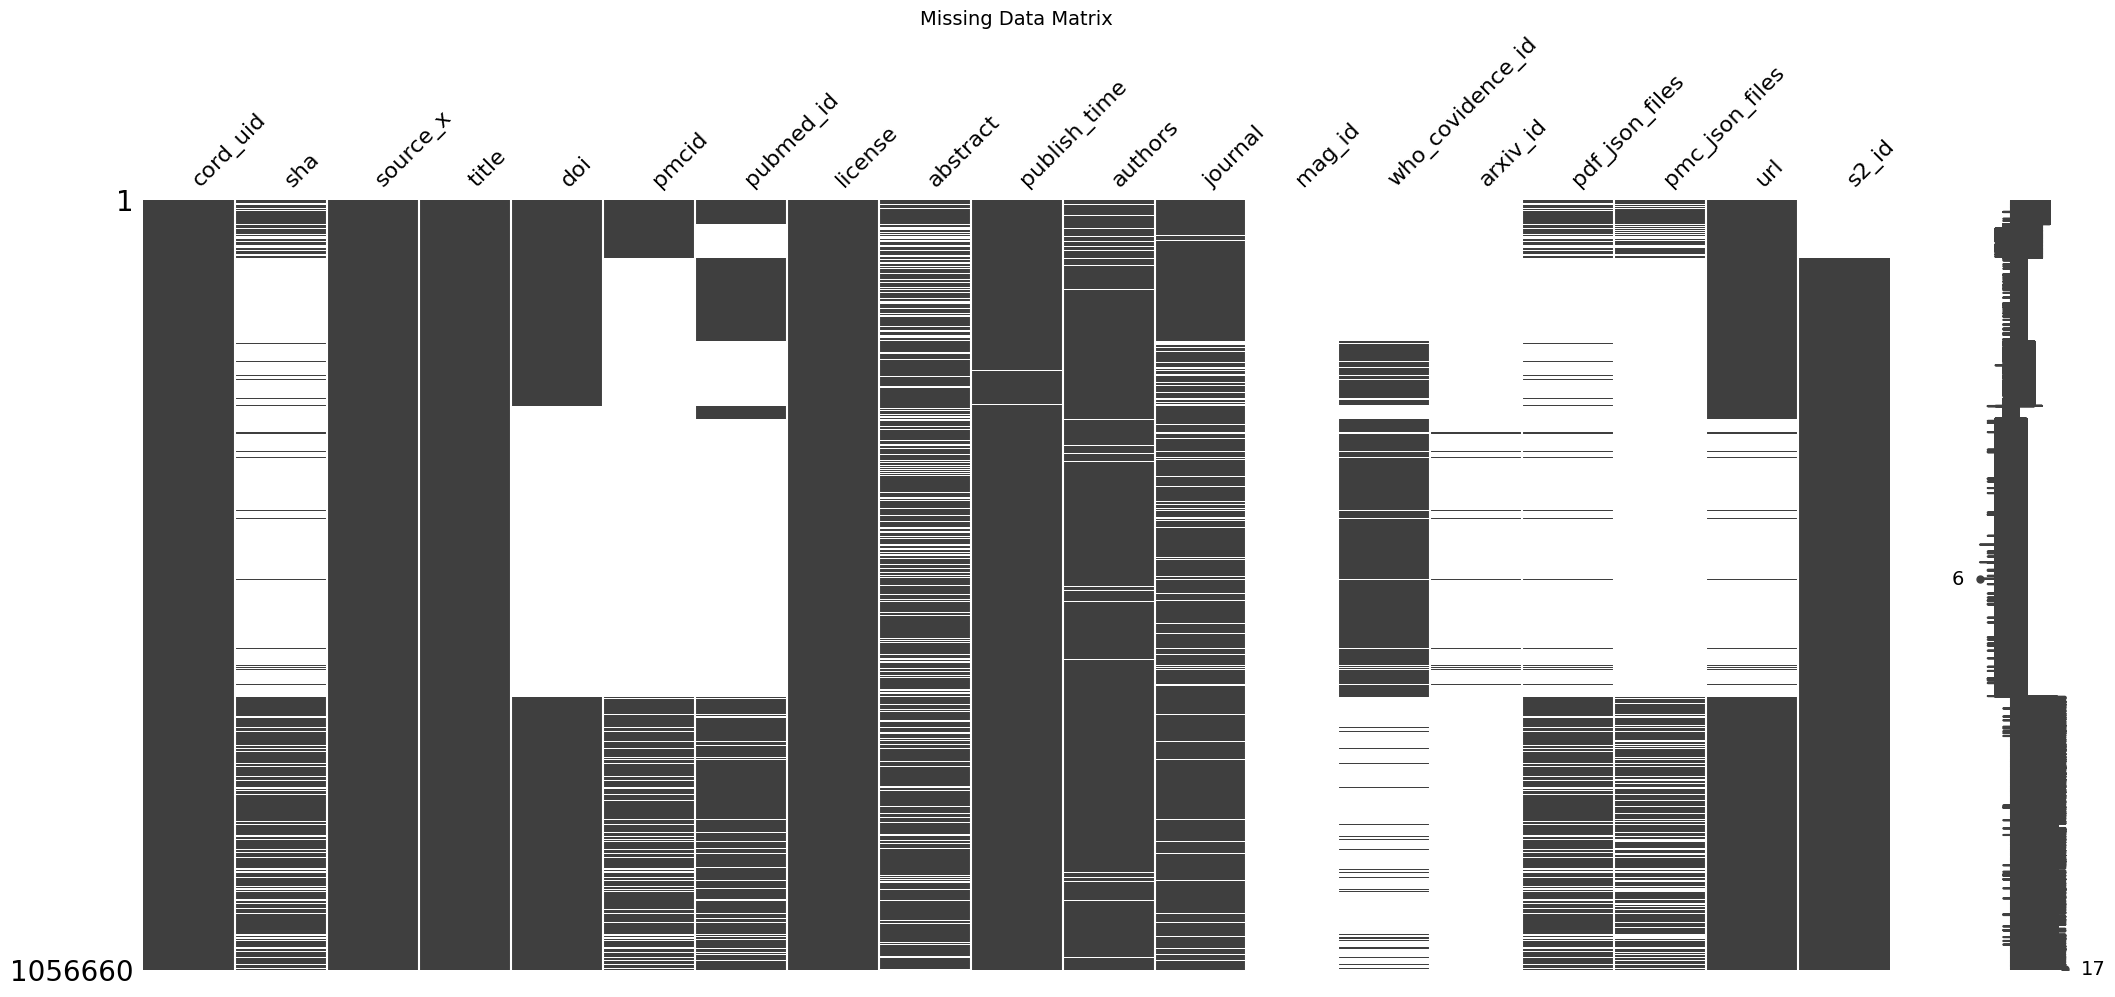

In [12]:
import missingno as msno
import matplotlib.pyplot as plt

# Eksik veri matrisini çiz
msno.matrix(df)
plt.title("Missing Data Matrix", fontsize=14)
plt.show()


In [13]:
# 1. Belirlenen eşik değerin üstündeki sütunları bul (örneğin %50)
threshold = 50
columns_to_drop = missing_percent[missing_percent > threshold].index.tolist()

# 2. Hangi sütunların düşürüleceğini yazdır
print(f"Şu sütunlar % {threshold}’den fazla eksik veri içeriyor ve silinecek:\n{columns_to_drop}")

# 3. Bu sütunları veri setinden çıkar
df = df.drop(columns=columns_to_drop)

Şu sütunlar % 50’den fazla eksik veri içeriyor ve silinecek:
['sha', 'pmcid', 'pubmed_id', 'mag_id', 'who_covidence_id', 'arxiv_id', 'pdf_json_files', 'pmc_json_files']


In [14]:
for i, col in enumerate(df.columns, 1):
    print(f"{i}. {col}")

1. cord_uid
2. source_x
3. title
4. doi
5. license
6. abstract
7. publish_time
8. authors
9. journal
10. url
11. s2_id


In [15]:
df.shape

(1056660, 11)

# Kalan Eksik Verilerin Analizi

Veri setinde kalan eksik verilerin yerini dolduracağız ya da sileceğiz.

In [17]:
# 'title' ve 'abstract' sütunları NLP (Doğal Dil İşleme) analizinde önemli olduğu için
# bu sütunlarda eksik (NaN) olan satırları tamamen siliyoruz
df = df.dropna(subset=['title', 'abstract'])

# Geri kalan tüm eksik değerleri 'unknown' ifadesiyle dolduruyoruz
df = df.fillna('unknown')

Bu adımdan sonra veri setimizde sayısal bi değer kalmamış oluyor.

Ve zaten bu çalışmada yalnızca metin verileri (başlık ve özet) üzerinde doğal dil işleme teknikleri uygulandığı için, sayısal nitelikteki sütunlar analiz kapsamı dışında bırakılmıştır. Eksik veri temizliği yalnızca metin odaklı sütunlara uygulanmış, sayısal değişkenler modelde kullanılmadığından analiz sürecine dâhil edilmemiştir.

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 821005 entries, 0 to 1056659
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   cord_uid      821005 non-null  object
 1   source_x      821005 non-null  object
 2   title         821005 non-null  object
 3   doi           821005 non-null  object
 4   license       821005 non-null  object
 5   abstract      821005 non-null  object
 6   publish_time  821005 non-null  object
 7   authors       821005 non-null  object
 8   journal       821005 non-null  object
 9   url           821005 non-null  object
 10  s2_id         821005 non-null  object
dtypes: object(11)
memory usage: 75.2+ MB


Son durumda veri setinin boyutunu (satır, sütun) kontrol ediyoruz,

In [19]:
df.shape

(821005, 11)

# Metin Temizleme ve Ön İşleme

Bu adımda, metin analizi yapabilmek için title ve abstract sütunlarındaki veriler temizlenir ve ön işleme sürecinden geçirilir.

In [20]:
import re  # Regular expression (düzenli ifade) kütüphanesi

# Temizleme fonksiyonu tanımla
def clean_text(text):
    text = text.lower()  # Tüm harfleri küçük yap
    text = re.sub(r'\d+', '', text)  # Sayıları kaldır
    text = re.sub(r'[^\w\s]', '', text)  # Noktalama işaretlerini kaldır
    text = re.sub(r'\s+', ' ', text).strip()  # Fazla boşlukları kaldır, kenar boşluklarını temizle
    return text

# Fonksiyonu 'title' ve 'abstract' sütunlarına uygula
df['title_clean'] = df['title'].apply(clean_text)
df['abstract_clean'] = df['abstract'].apply(clean_text)

# Word Cloud (Kelime Bulutu) Görselleştirmesi

Bu adımda başlık(title) sütunundaki en çok tekrar eden kelimeleri kelime bulutu (word cloud) ile görselleştiriyoruz,

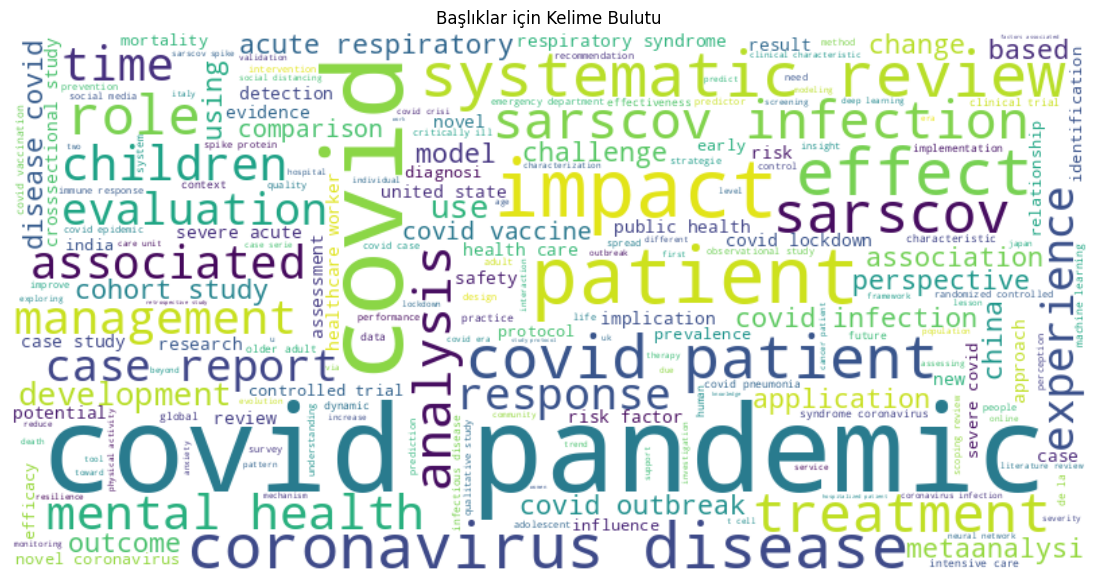

In [21]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Temizlenmiş tüm başlıkları (title_clean) birleştirip tek bir metin haline getiriyoruz
text = " ".join(df['title_clean'].dropna())

# Kelime bulutunu oluşturuyoruz
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white'
).generate(text)

# Kelime bulutunu görselleştiriyoruz
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Eksenleri gizle
plt.title("Başlıklar için Kelime Bulutu")  # Başlık ekleyebilirsin
plt.show()


Bu adımda özet(abstract) sütunundaki en çok tekrar eden kelimeleri kelime bulutu (word cloud) ile görselleştiriyoruz,

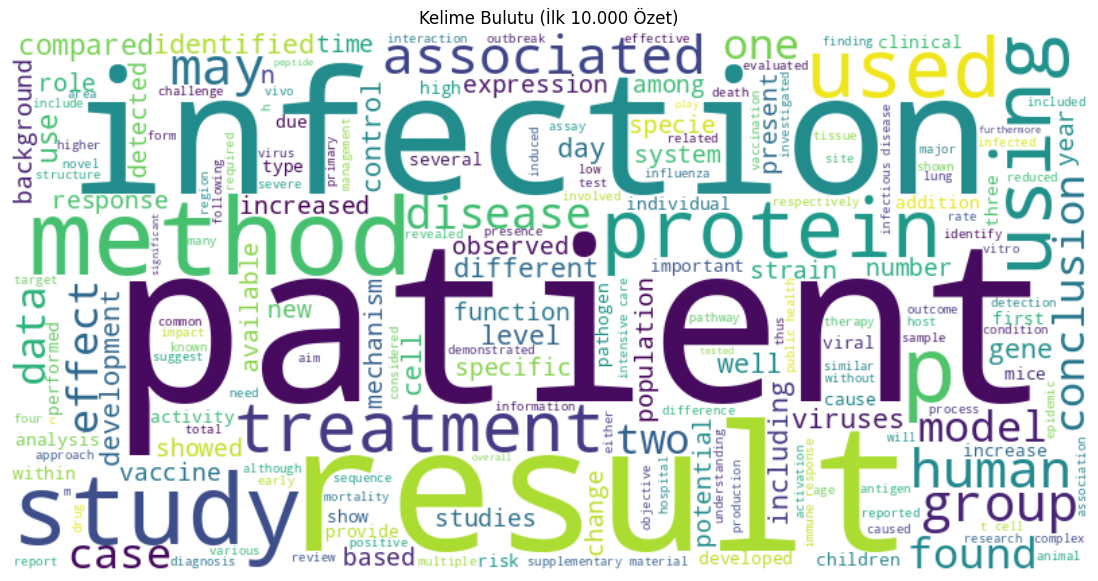

In [22]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Bellek sorunlarını önlemek için, temizlenmiş abstract'lardan ilk 10.000 tanesini birleştiriyoruz
sampled_text = " ".join(df['abstract_clean'].dropna().iloc[:10000])

# WordCloud nesnesini oluştur ve örnek metin üzerinden kelime bulutunu oluştur
wordcloud_sampled = WordCloud(
    width=800, 
    height=400, 
    background_color='white'
).generate(sampled_text)

# Kelime bulutunu görselleştir
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud_sampled, interpolation='bilinear')
plt.axis('off')  # Eksenleri kapatıyoruz
plt.title("Kelime Bulutu (İlk 10.000 Özet)")  # Grafik başlığı
plt.show()

# Özetlerde (Abstracts) En Sık Kullanılan Kelimeler

Bu aşamada, temizlenmiş abstract (özet) metinlerde en yaygın kelimeleri görselleştiriyoruz. Bu sayede COVID-19 konusundaki bilimsel yayınlarda hangi kelimelerin ön plana çıktığını analiz etmiş oluyoruz.

In [23]:
from collections import Counter
import pandas as pd

# İlk 10.000 temizlenmiş özet (abstract_clean) metnini birleştiriyoruz
sampled_text = " ".join(df['abstract_clean'].dropna().iloc[:10000])

# Metni kelimelere bölüp (tokenize) her kelimenin kaç kez geçtiğini sayıyoruz
word_counts = Counter(sampled_text.split())

# En çok geçen 20 kelimeyi seçip DataFrame'e dönüştürüyoruz
common_words = pd.DataFrame(word_counts.most_common(20), columns=['Kelime', 'Frekans'])

# Tabloyu gösteriyoruz
common_words

,Kelime,Frekans
0,the,100462
1,of,85705
2,and,73038
3,in,54494
4,to,40510
5,a,33634
6,with,22254
7,for,19825
8,is,15854
9,that,15463


# publish_time Sütunundaki Eksik Verilerin Temizlenmesi

Bu adımda, publish_time (yayınlanma zamanı) sütununda eksik olan satırlar veri setinden çıkarılır. Çünkü yayın tarihi bilgisi olmayan kayıtlar, analiz ve modelleme süreçlerinde hatalara yol açabilir. Böylece sadece yayın zamanı bilgisi mevcut olan verilerle çalışarak, doğruluğu ve güvenilirliği artırıyoruz.

In [24]:
df_cleaned = df[df['publish_time'].notnull()].copy()

**Yıllara Göre Yayın Sayısı Analizi**

Bu kısımda, koronavirüs konusundaki bilimsel yayınların yıl bazındaki dağılımını inceleyerek, özellikle COVID-19 salgını süresince araştırma aktivitelerindeki değişimleri analiz ediyoruz.

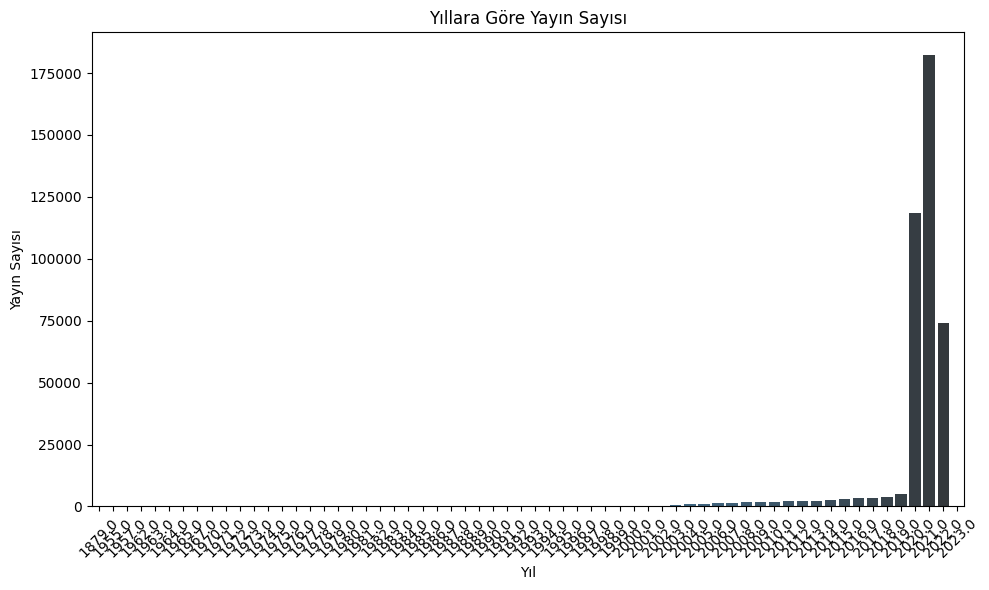

In [25]:
# 1. 'publish_time' sütununu datetime (tarih-zaman) formatına çeviriyoruz
# errors='coerce' ile dönüştürülemeyen değerler NaT (eksik tarih) olur
df_cleaned['publish_time'] = pd.to_datetime(df_cleaned['publish_time'], errors='coerce')

# 2. Yıl bilgisi için 'year' adında yeni bir sütun oluşturuyoruz
df_cleaned['year'] = df_cleaned['publish_time'].dt.year

# 3. Yıllara göre yayın sayısını hesaplıyoruz
yearly_counts = df_cleaned['year'].value_counts().sort_index()

# 4. Yıllara göre yayın sayısını bar grafiği ile görselleştiriyoruz
plt.figure(figsize=(10,6))
sns.barplot(x=yearly_counts.index, y=yearly_counts.values, palette='Blues_d')
plt.title('Yıllara Göre Yayın Sayısı')
plt.xlabel('Yıl')
plt.ylabel('Yayın Sayısı')
plt.xticks(rotation=45)  # X eksenindeki yılları 45 derece döndürerek daha okunaklı yapıyoruz
plt.tight_layout()  # Grafik elemanlarının düzgün yerleşmesi için
plt.show()

**En Çok Yayın Yapan Dergiler**

Bu aşamada, elimizdeki veri setinde en fazla yayına sahip olan dergiler tespit edilir.

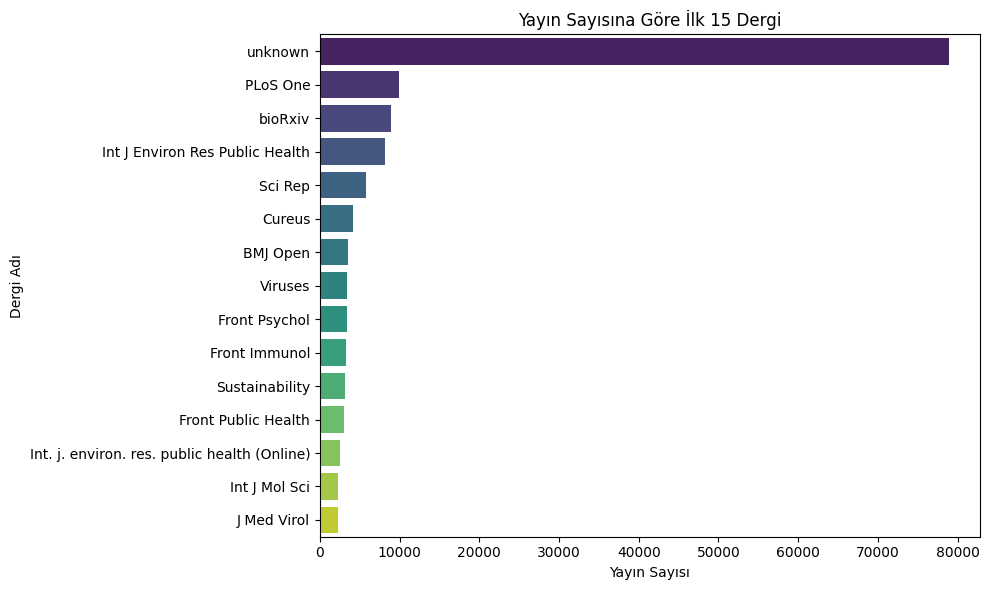

In [26]:
# 1. Veri setindeki en çok yayın yapan ilk 15 dergiyi buluyoruz
top_journals = df['journal'].value_counts().head(15)

# 2. Bu dergilerin yayın sayılarını yatay bar grafiği olarak çiziyoruz
plt.figure(figsize=(10,6))
sns.barplot(x=top_journals.values, y=top_journals.index, palette='viridis')
plt.title('Yayın Sayısına Göre İlk 15 Dergi')
plt.xlabel('Yayın Sayısı')
plt.ylabel('Dergi Adı')
plt.tight_layout()  # Grafik elemanlarının yerleşimini iyileştirir
plt.show()

**Yayınların Dergi Dağılımı**

Bu bölümde, CORD-19 veri setindeki yayınların hangi dergilerde yoğunlaştığını inceleyerek, pandemi dönemindeki en aktif yayın kaynaklarını belirliyoruz.

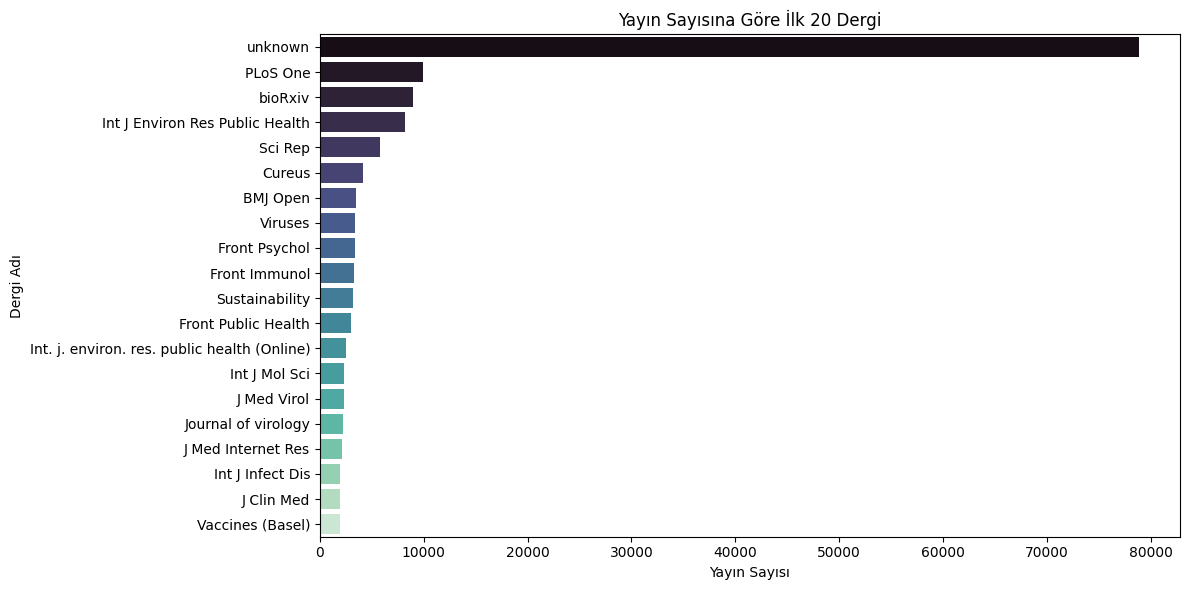

In [27]:
# 1. Temizlenmiş veri setinde ('df_cleaned') en çok yayına sahip ilk 20 dergiyi sayıyoruz
top_journals = df_cleaned['journal'].value_counts().head(20)

# 2. Bu dergilerin yayın sayılarını yatay bar grafiği olarak çiziyoruz
plt.figure(figsize=(12, 6))
sns.barplot(x=top_journals.values, y=top_journals.index, palette='mako')
plt.title('Yayın Sayısına Göre İlk 20 Dergi')
plt.xlabel('Yayın Sayısı')
plt.ylabel('Dergi Adı')
plt.tight_layout()  # Grafik elemanlarının yerleşimini düzenler
plt.show()

**Yayın Sayısına Göre En Çok Katkı Sağlayan Dergiler**

Bu aşamada, CORD-19 veri setindeki yayın sayısına göre en çok katkıda bulunan akademik dergiler tespit edilir. Böylece COVID-19 ile ilgili bilimsel yayınlarda hangi dergilerin daha etkin olduğunu görürüz.

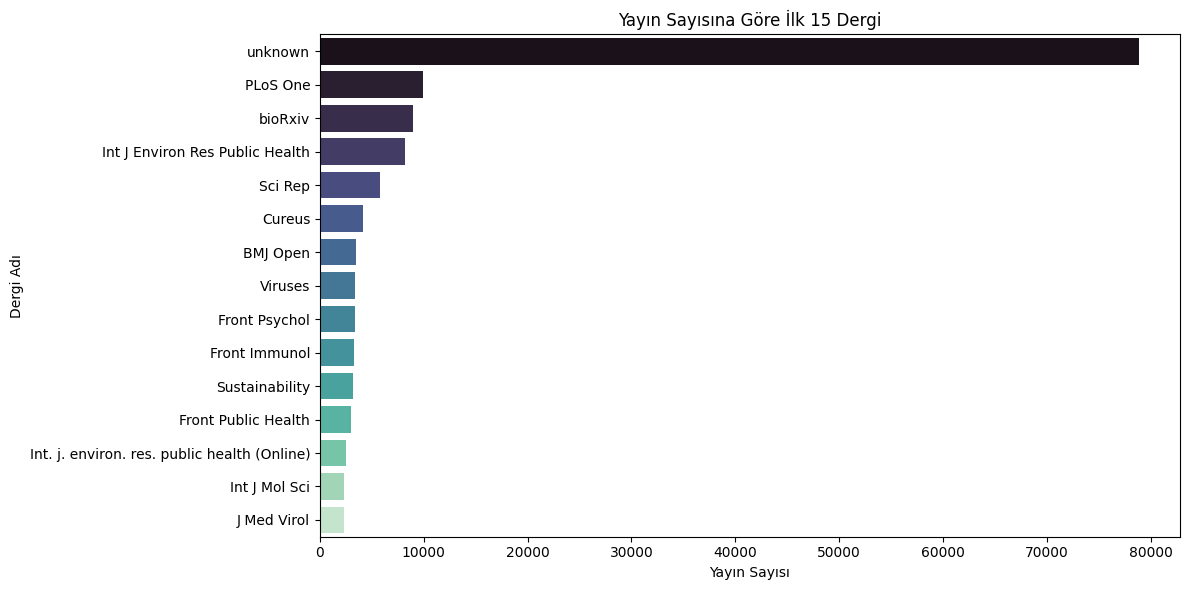

In [28]:
# 1. Temizlenmiş veri setinde ('df_cleaned') en çok yayına sahip ilk 15 dergiyi sayıyoruz
top_journals = df_cleaned['journal'].value_counts().head(15)

# 2. Bu dergilerin yayın sayılarını yatay bar grafiği olarak çiziyoruz
plt.figure(figsize=(12, 6))
sns.barplot(x=top_journals.values, y=top_journals.index, palette='mako')
plt.title('Yayın Sayısına Göre İlk 15 Dergi')
plt.xlabel('Yayın Sayısı')
plt.ylabel('Dergi Adı')
plt.tight_layout()  # Grafik elemanlarının yerleşimini düzenler
plt.show()

# Sonuç ve Özet

Bu çalışmada, COVID-19 bilimsel literatürünü içeren ve 1 milyondan fazla kaydı barındıran CORD-19 veri seti kapsamlı bir şekilde analiz edilmiştir. Veri setindeki eksik veriler incelenmiş ve uygun temizleme işlemleri gerçekleştirilmiştir. Ardından, metin verileri kelime bulutları aracılığıyla görselleştirilmiş ve yıllara göre yayın trendleri detaylı biçimde değerlendirilmiştir.

Analizler sonucunda aşağıdaki temel bulgular elde edilmiştir:

* Özet metinlerinde "covid", "hastalar" ve "virüs" gibi anahtar kelimelerin yüksek sıklıkla yer aldığı tespit edilmiştir; bu durum veri setinin içerik odak noktasını doğrulamaktadır.

* Yayın sayısında 2020 yılında kayda değer bir artış gözlenmiş olup, bu artış pandemi sürecinin bilimsel araştırmalar üzerindeki etkisini yansıtmaktadır.

* "Journal of Virology" ve "BMJ" gibi prestijli akademik dergilerin COVID-19 literatürüne önemli katkılarda bulunduğu belirlenmiştir.

Gerçekleştirilen bu keşifsel analiz, COVID-19 araştırmalarına yönelik metin madenciliği ve sınıflandırma modellerinin geliştirilmesi için sağlam bir temel teşkil etmektedir.